#    Introducción

Este análisis se basa en un conjunto de datos sobre el desempeño y la rotación de empleados en una fábrica, con 411,948 observaciones durante 18 meses. Los datos incluyen eventos como asistencia, eficacia laboral, accidentes, renuncias e incorporaciones de nuevos empleados. El objetivo es explorar cómo factores como la edad, el desempeño y el trabajo en equipo afectan la eficacia y la rotación, utilizando técnicas de análisis de datos para identificar patrones y relaciones causales.

Fuente: Kaggle


# Preguntas de Interés

1. ¿Cómo varía la eficacia  entre los distintos roles (por ejemplo, entre Laborers y Team Leaders)?

Hipotesis: Los Team Leaders tendrán una eficacia promedio más alta que los Laborers debido a su mayor experiencia y responsabilidad

2. ¿Existen diferencias significativas en la eficacia diaria entre empleados masculinos y femeninos?

Hipotesis:  No habrá diferencias significativas en eficacia por género, ya que esta depende más de habilidades y de su posición en la empresa

3. ¿Cómo influye la edad del empleado en su eficacia diaria?

Hipotesis: La eficiencia será más alta en empleados de 30-40 años (equilibrio entre experiencia y energía) y menor en jóvenes (<25) y mayores (>60).

4. ¿Se asocia un índice de salud más alto con mayores niveles de eficacia?

Hipotesis: Sí, empleados con mejor salud tendrán eficacia más alta y estable


5. ¿La eficacia presenta patrones estacionales según el día de la semana, el día del mes o el mes del año?

Hipótesis: La eficacia será menor los lunes (inicio de semana) y viernes (fatiga), y decayendo hacia fin de mes por estrés de deadlines.

6. ¿Cómo impacta la diferencia de edad entre un empleado y su supervisor en la eficacia diaria?

Hipótesis: La mayor eficacia se logra con supervisores de edad superior a los operarios

7. ¿Los empleados con bajo compromiso tienen mayor tasa de resignación?
Hipótesis: Sí, el compromiso bajo predice renuncias voluntaria.



Importar Librerías


In [ ]:
!pip install patool


import gdown
import patoolib
import pandas as pd
from io import BytesIO
import tempfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

Descarga de la base de datos desde la URL

In [ ]:
# URL de Google Drive
url = "https://drive.google.com/file/d/1B2F_-yLpBFiTyNzpE4M4hxDtMHUqGnPU/view?usp=drive_link"

# Extraer el ID del archivo
file_id = url.split("/d/")[1].split("/")[0]

# Descargar el archivo en memoria
output = BytesIO()
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Guardar el archivo .rar en un archivo temporal
with tempfile.NamedTemporaryFile(delete=False, suffix=".rar") as tmp_file:
    tmp_file.write(output.getvalue())
    rar_path = tmp_file.name

# Descomprimir el archivo .rar en una carpeta temporal
extract_dir = tempfile.mkdtemp()
patoolib.extract_archive(rar_path, outdir=extract_dir)

# Cargar el archivo CSV (En este caso hay un solo archivo en el .rar)
csv_file = os.path.join(extract_dir, os.listdir(extract_dir)[0])

# Intentar con diferentes codificaciones
encodings = ['utf-8', 'latin-1', 'ISO-8859-1', 'Windows-1252']
df = None

for encoding in encodings:
    try:
        df = pd.read_csv(csv_file, encoding=encoding)
        print(f"Archivo cargado correctamente con codificación: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Error con la codificación: {encoding}")

if df is not None:
    # Exploración inicial
    print("Primeras filas del dataset:")
    print(df.head())

    print("\nInformación del dataset:")
    print(df.info())

    print("\nValores faltantes por columna:")
    print(df.isnull().sum())
else:
    print("No se pudo cargar el archivo con ninguna de las codificaciones probadas.")

# Limpiar archivos temporales
os.remove(rar_path)
for file in os.listdir(extract_dir):
    os.remove(os.path.join(extract_dir, file))
os.rmdir(extract_dir)

Downloading...
From: https://drive.google.com/uc?id=1B2F_-yLpBFiTyNzpE4M4hxDtMHUqGnPU
To: <_io.BytesIO object at 0x7a95b7d11df0>
100%|██████████| 2.95M/2.95M [00:00<00:00, 36.1MB/s]
INFO patool: Extracting /tmp/tmpbm_b6_qe.rar ...
INFO:patool:Extracting /tmp/tmpbm_b6_qe.rar ...
INFO patool: running /usr/bin/unrar x -kb -or -- /tmp/tmpbm_b6_qe.rar
INFO:patool:running /usr/bin/unrar x -kb -or -- /tmp/tmpbm_b6_qe.rar
INFO patool: ... /tmp/tmpbm_b6_qe.rar extracted to `/tmp/tmpbu0f3t3e'.
INFO:patool:... /tmp/tmpbm_b6_qe.rar extracted to `/tmp/tmpbu0f3t3e'.


Error con la codificación: utf-8


<ipython-input-106-64fa3e621fcf>:29: DtypeWarning: Columns (35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding=encoding)


Archivo cargado correctamente con codificación: latin-1
Primeras filas del dataset:
     sub_ID  sub_fname sub_lname  sub_age sub_sex sub_shift sub_team     sub_role                                       sub_coll_IDs  sub_colls_same_sex_prtn  sub_health_h  sub_commitment_h  sub_perceptiveness_h  sub_dexterity_h  sub_sociality_h  sub_goodness_h  sub_strength_h  sub_openmindedness_h sub_workstyle_h      sup_ID sup_fname sup_lname  sup_age  sup_sub_age_diff sup_sex       sup_role  sup_commitment_h  sup_perceptiveness_h  sup_goodness_h event_date  event_week_in_series  event_day_in_series  event_weekday_num event_weekday_name behav_comptype_h behav_cause_h  actual_efficacy_h record_comptype record_cause  recorded_efficacy recorded_note_from_sup record_conf_matrix_h
0  98000001    Rebecca     Bauer       40       F   Shift 1   Team 1  Team Leader  [98000002, 98000003, 98000004, 98000005, 98000...                 0.714286         0.895             1.000                 0.659            0.592

# Exploración inicial del Dataset

Veamos:

- Primeras Filas del Dataset
- Información General del Dataset
- Estadísticas Descriptivas

In [ ]:
# Ajustar la configuración de pandas para evitar truncamiento
pd.set_option('display.max_rows', 100)  # Mostrar hasta 100 filas
pd.set_option('display.max_columns', 100)  # Mostrar hasta 100 columnas
pd.set_option('display.width', 1000)  # Ajustar el ancho de la salida

# Obtener el número de filas y columnas
filas, columnas = df.shape

# Mostrar el resultado
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

# Mostrar las primeras 5 filas del dataset
print("Primeras filas del dataset:")
print(df.head())



El dataset tiene 411948 filas y 42 columnas.
Primeras filas del dataset:
     sub_ID  sub_fname sub_lname  sub_age sub_sex sub_shift sub_team     sub_role                                       sub_coll_IDs  sub_colls_same_sex_prtn  sub_health_h  sub_commitment_h  sub_perceptiveness_h  sub_dexterity_h  sub_sociality_h  sub_goodness_h  sub_strength_h  sub_openmindedness_h sub_workstyle_h      sup_ID sup_fname sup_lname  sup_age  sup_sub_age_diff sup_sex       sup_role  sup_commitment_h  sup_perceptiveness_h  sup_goodness_h event_date  event_week_in_series  event_day_in_series  event_weekday_num event_weekday_name behav_comptype_h behav_cause_h  actual_efficacy_h record_comptype record_cause  recorded_efficacy recorded_note_from_sup record_conf_matrix_h
0  98000001    Rebecca     Bauer       40       F   Shift 1   Team 1  Team Leader  [98000002, 98000003, 98000004, 98000005, 98000...                 0.714286         0.895             1.000                 0.659            0.592           

In [ ]:
# Mostrar las primeras 15 columnas
print("Primeras 10 columnas:")
df[df.columns[:15]].info(verbose=True, show_counts=True)

#Se muestra cada 15 columnas ya que desde VSC me truncaba columnas
#Se decide dejar registrado el proceso realizado


Primeras 10 columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   sub_ID                   411948 non-null  int64  
 1   sub_fname                411948 non-null  object 
 2   sub_lname                411948 non-null  object 
 3   sub_age                  411948 non-null  int64  
 4   sub_sex                  411948 non-null  object 
 5   sub_shift                411948 non-null  object 
 6   sub_team                 411948 non-null  object 
 7   sub_role                 411948 non-null  object 
 8   sub_coll_IDs             411136 non-null  object 
 9   sub_colls_same_sex_prtn  410957 non-null  float64
 10  sub_health_h             411948 non-null  float64
 11  sub_commitment_h         411948 non-null  float64
 12  sub_perceptiveness_h     411948 non-null  float64
 13  sub_dexterity_h          411948 non-n

In [ ]:
# Mostrar entre las columnas 15 y 30
print("Columnas entre 15 y 30 columnas:")
df[df.columns[15:30]].info(verbose=True, show_counts=True)

Columnas entre 15 y 30 columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   sub_goodness_h        411948 non-null  float64
 1   sub_strength_h        411948 non-null  float64
 2   sub_openmindedness_h  411948 non-null  float64
 3   sub_workstyle_h       411948 non-null  object 
 4   sup_ID                411136 non-null  float64
 5   sup_fname             411136 non-null  object 
 6   sup_lname             411136 non-null  object 
 7   sup_age               411136 non-null  float64
 8   sup_sub_age_diff      411136 non-null  float64
 9   sup_sex               411136 non-null  object 
 10  sup_role              411136 non-null  object 
 11  sup_commitment_h      411136 non-null  float64
 12  sup_perceptiveness_h  411136 non-null  float64
 13  sup_goodness_h        411136 non-null  float64
 14  event_date         

In [ ]:
# Mostrar entre las columnas 30 y 42
print("Columnas entre 15 y 42 columnas:")
df[df.columns[30:45]].info(verbose=True, show_counts=True)

Columnas entre 15 y 42 columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   event_week_in_series    411948 non-null  int64  
 1   event_day_in_series     411948 non-null  int64  
 2   event_weekday_num       411948 non-null  int64  
 3   event_weekday_name      411948 non-null  object 
 4   behav_comptype_h        411846 non-null  object 
 5   behav_cause_h           77 non-null      object 
 6   actual_efficacy_h       191657 non-null  float64
 7   record_comptype         408010 non-null  object 
 8   record_cause            102 non-null     object 
 9   recorded_efficacy       191272 non-null  float64
 10  recorded_note_from_sup  18589 non-null   object 
 11  record_conf_matrix_h    21715 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 37.7+ MB


Interpretación de las columnas:


- behav_cause_h, record_cause, recorded_note_from_sup, y record_conf_matrix_h poseen muchos valores faltantes (99,9%), por lo que no se utilizarán para un analisis univariado, se decide no eliminar ya que pueden contener información puntual relevante
- behav_comptype_h  y record_comptype poseen muy pocos faltantes, por lo que se puede optar por eliminar esos valores faltantes, replazar con la moda, o utilizar otros métodos más avanzados si se considera necesario
- actual_efficacy_h y recorded_efficacy poseen un 50% de valores faltantes, por lo que la desición va a depender de un mayor analisis

In [ ]:
# Obtener estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
             sub_ID        sub_age  sub_colls_same_sex_prtn   sub_health_h  sub_commitment_h  sub_perceptiveness_h  sub_dexterity_h  sub_sociality_h  sub_goodness_h  sub_strength_h  sub_openmindedness_h        sup_ID        sup_age  sup_sub_age_diff  sup_commitment_h  sup_perceptiveness_h  sup_goodness_h  event_week_in_series  event_day_in_series  event_weekday_num  actual_efficacy_h  recorded_efficacy
count  4.119480e+05  411948.000000            410957.000000  411948.000000     411948.000000         411948.000000    411948.000000    411948.000000   411948.000000   411948.000000         411948.000000  4.111360e+05  411136.000000     411136.000000     411136.000000         411136.000000   411136.000000         411948.000000        411948.000000      411948.000000      191657.000000      191272.000000
mean   9.800036e+07      41.395637                 0.502392       0.747096          0.751878              0.742695         0.741493         0.738500        0.73

Interpretación:

- Edad media= 41 años, con una variabilidad moderada, los datos de edad parecen estar correctos al no contener menores de edad y hasta un máx de 65 años
- La salud general de los empleados es buena, con baja desviación, aunque hay casos puntuales para analizar
- La eficacia varía mucho entre los empleados, y al contener valores nulos indica que para obtener información más precisa va a ser necesario eliminar nulos y valores atípicos, profundizar más en los valores extremos, si son verdaderos casos excepcionales o no son correctos por lo que para mayor presición se deben eliminar
- Las características psicológicas de los empleados tienen también valores extremos para profundizar, como en el compromiso, percepción, destreza. Estas columnas pueden tener información valiosa como poder predecir el desempeño o la rotación de los empleados



#   Análisis Exploratorio de Datos (EDA)

#   Análisis Univariado

- Sub_age
- Sub_health
- actual_efficacy



In [ ]:
# Estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
print(df[['sub_age', 'sub_health_h', 'actual_efficacy_h']].describe())

Estadísticas descriptivas de las variables numéricas:
             sub_age   sub_health_h  actual_efficacy_h
count  411948.000000  411948.000000      191657.000000
mean       41.395637       0.747096           0.669063
std        13.735554       0.154026           0.396246
min        18.000000       0.153000           0.000000
25%        29.000000       0.655000           0.410000
50%        41.000000       0.765000           0.615000
75%        53.000000       0.859000           0.874000
max        65.000000       1.000000           3.763000


- Dentro del rango de edad, esta todo correcto dado el rango min y max, con una media de 41 años

- El índice de salud está centrado alrededor de 0.747, con una dispersión baja, existen sujetos con salud "perfecta"
- Hay valores faltantes, y parece que hay valores atípicos en el extremo superior, qeu difieren de la media

Visualización de las distribuciones

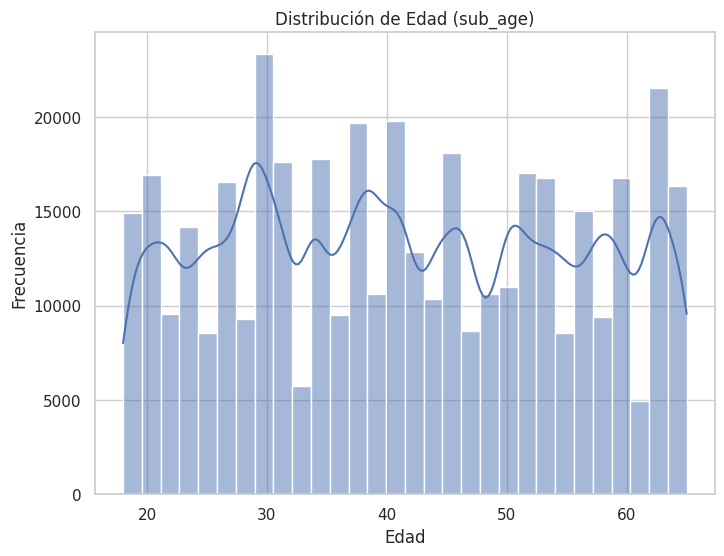

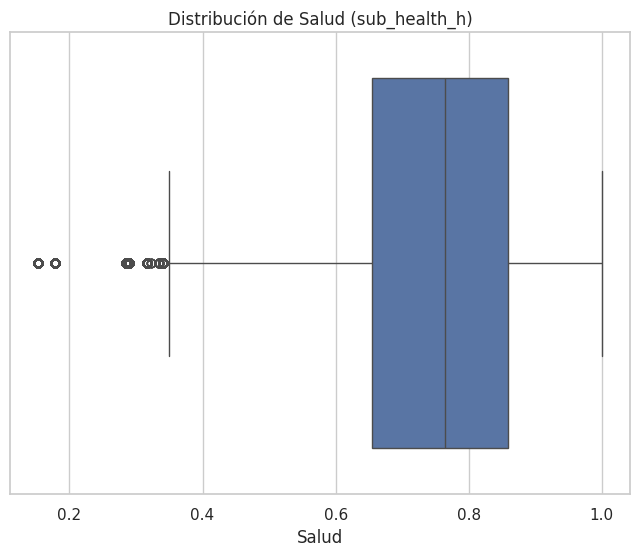

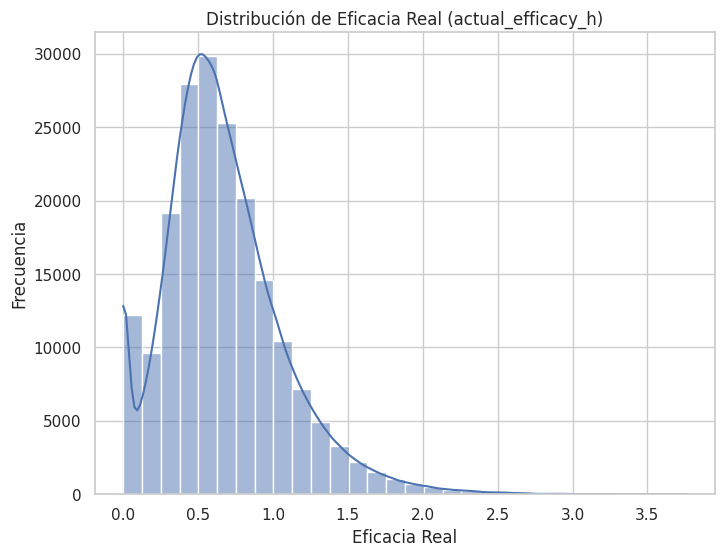

In [ ]:
# Histograma para sub_age
plt.figure(figsize=(8, 6))
sns.histplot(df['sub_age'], kde=True, bins=30)
plt.title('Distribución de Edad (sub_age)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para sub_health_h
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sub_health_h'])
plt.title('Distribución de Salud (sub_health_h)')
plt.xlabel('Salud')
plt.show()

# Histograma para actual_efficacy_h
plt.figure(figsize=(8, 6))
sns.histplot(df['actual_efficacy_h'].dropna(), kde=True, bins=30)
plt.title('Distribución de Eficacia Real (actual_efficacy_h)')
plt.xlabel('Eficacia Real')
plt.ylabel('Frecuencia')
plt.show()

Interpretación

- Sub_age = Las barras del histograma son relativamente uniformes, Esto sugiere que no hay una edad predominante en la población. Las edades están distribuidas de manera relativamente equitativa entre 18 y 65 años. No hay un grupo de edad que domine significativamente
- Sub_Health = Hay outliers por debajo, podrían ser casos especiales que merecen una investigación más profunda (por ejemplo, sujetos con problemas de salud específicos), pero en general, la mayoría de los sujetos tienen un índice de salud relativamente alto. Indagar más sobre estas personas con bajos índices
- Efficacy = Está sesgada a la izquierda, con pocos sujetos de eficacia muy alta, la eficacia no está distribuida de manera uniforme Podría ser el caso de que existan factores que influyan en la eficacia de los sujetos (por ejemplo, experiencia, habilidades, etc.)

#   Análisis Univariado

- Sub_sex
- Sub_role

Frecuencias de sub_sex:
sub_sex
F    215556
M    196392
Name: count, dtype: int64


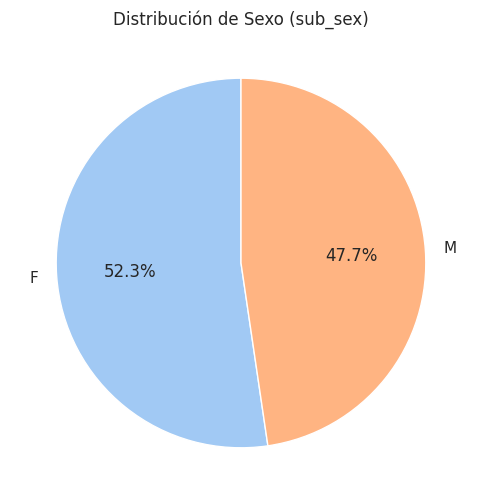

Frecuencias de sub_role:
sub_role
Laborer                389184
Team Leader             19469
Shift Manager            2483
Production Director       812
Name: count, dtype: int64


<ipython-input-114-1be91a80ebee>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencias_role.values, y=frecuencias_role.index, palette='pastel')


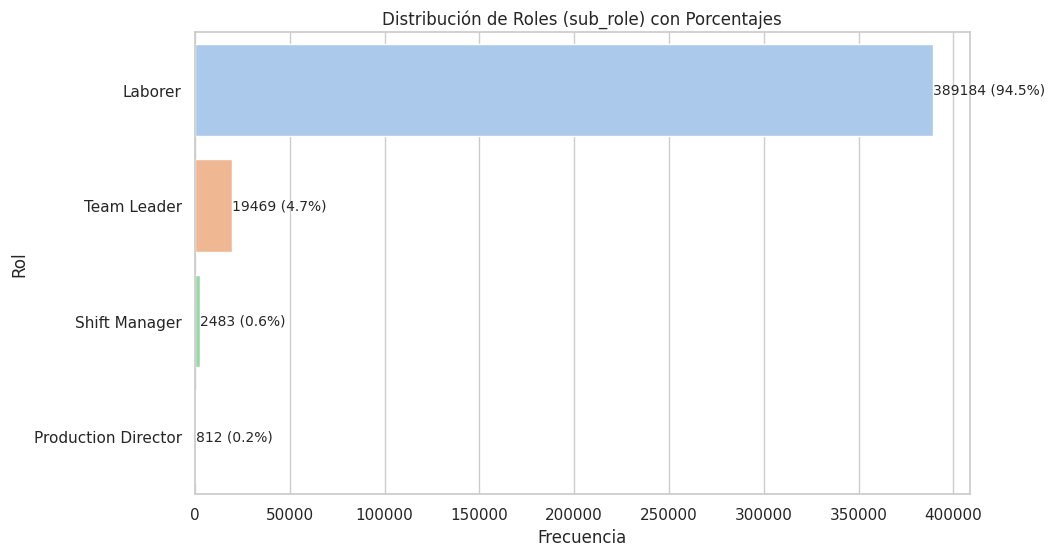

In [ ]:
# Frecuencias de sub_sex
print("Frecuencias de sub_sex:")
print(df['sub_sex'].value_counts())

# Gráfico de torta para sub_sex
frecuencias_sex = df['sub_sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(frecuencias_sex, labels=frecuencias_sex.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Sexo (sub_sex)')
plt.show()


# Frecuencias de sub_role
print("Frecuencias de sub_role:")
print(df['sub_role'].value_counts())

# Calcular frecuencias y porcentajes
frecuencias_role = df['sub_role'].value_counts()
porcentajes_role = (frecuencias_role / frecuencias_role.sum()) * 100  # Porcentajes

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=frecuencias_role.values, y=frecuencias_role.index, palette='pastel')

# Agregar etiquetas con los porcentajes
for i, (valor, porcentaje) in enumerate(zip(frecuencias_role.values, porcentajes_role.values)):
    ax.text(valor, i, f'{valor} ({porcentaje:.1f}%)', va='center', fontsize=10)

# Añadir título y etiquetas
plt.title('Distribución de Roles (sub_role) con Porcentajes')
plt.xlabel('Frecuencia')
plt.ylabel('Rol')
plt.show()

Interpretación

- En cuanto al género, al aproximarse tanto al 50% un analisis bivariado podrá dar más detalles al respecto,por ejemplo, con sub_role, pero habría que ver como por qué es string, por lo que se podría crear nueva columna con valores binarios..., para ver
- Laborer representa casi el 95% de los empleados se puede analizar cual es su relación con su eficiencia, y su edad

#   Analisis bivariado

Una matriz de correlación, no va a ser posible dado que la mayoría son variables cualitativas, a menos que se conviertan estas variables categóricas en formatos numéricos mediante técnicas como one-hot encoding o label encoding, permitiendo que sean incluidas en análisis de correlación de manera que reflejen su impacto en la variable objetivo.
- Género vs. Eficacia

- Rol vs. Eficacia

- Género vs. Rol

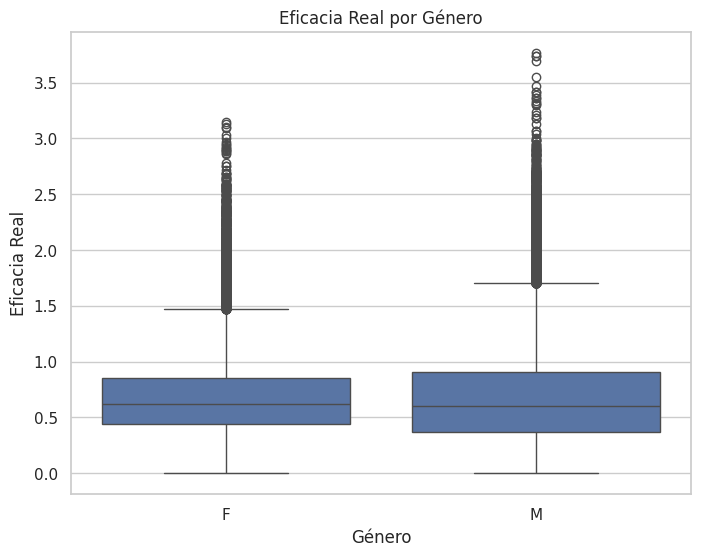

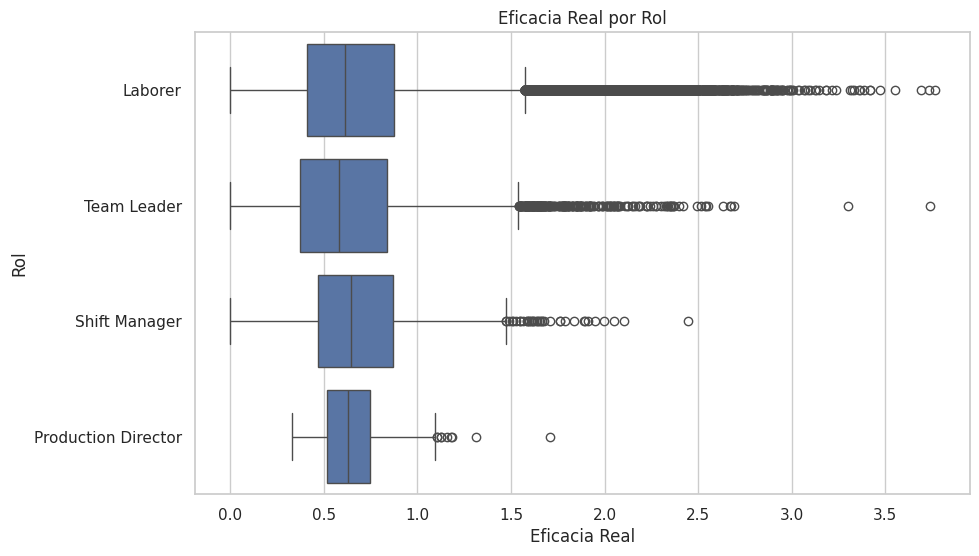

<Figure size 1000x600 with 0 Axes>

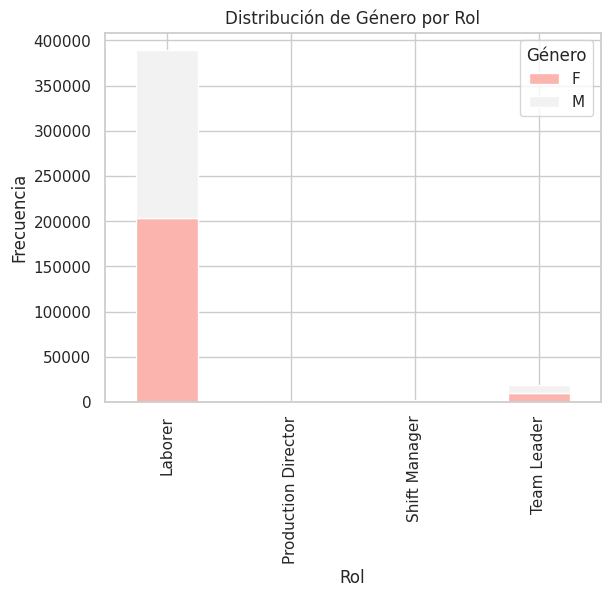

In [ ]:
# Boxplot de eficacia por género
plt.figure(figsize=(8, 6))
sns.boxplot(x='sub_sex', y='actual_efficacy_h', data=df)
plt.title('Eficacia Real por Género')
plt.xlabel('Género')
plt.ylabel('Eficacia Real')
plt.show()

# Boxplot de eficacia por rol
plt.figure(figsize=(10, 6))
sns.boxplot(x='actual_efficacy_h', y='sub_role', data=df, order=df['sub_role'].value_counts().index)
plt.title('Eficacia Real por Rol')
plt.xlabel('Eficacia Real')
plt.ylabel('Rol')
plt.show()

# Gráfico de barras apiladas para género por rol
plt.figure(figsize=(10, 6))
df.groupby(['sub_role', 'sub_sex']).size().unstack().plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Distribución de Género por Rol')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.show()

Interpretación:


- Boxplot de eficacia por género:
Se observa que tanto para hombres como mujeres, la distribución de la eficacia es bastante similar, Hay una gran cantidad de valores atípicos (puntos fuera del rango del bigote), lo que sugiere que existen casos donde la eficacia es mucho mayor que la media. No se aprecia una diferencia significativa en la distribución de la eficacia entre hombres y mujeres.

- Boxplot de eficacia por rol:
Se observa que los valores de eficacia varían significativamente entre roles pero con una media muy similar entre los mismos, aunque se puede destacar que la media del rol de "Shift manager" es un tanto superior al resto de roles, sin considerar aquellos valores atipicos. Los  "Laborer" y "Team Leader" tienen una mayor dispersión en la eficacia, con muchos valores atípicos en la parte superior. Existen personas con eficacia anormalmente alta, lo que podría indicar personas con una mayor experiencia dentro de la empresa o mayor compromiso siendo casos puntales.

- Distribución de Género por Rol:
No se logra detectar una variación muy grande entre los roles según genero, ni para el rol de Laborer ni en los altos mandos, lo que sugiere una distribución con mayor equidad entre los diferentes roles

 Edad vs eficacia


 (Se utiliza la mediana, por la cantidad de valores atipicos presentados, no se considera eliminar o utilizar alguna otra medida por que se consideró más practico y una opción más robusta utilizar la mediana)

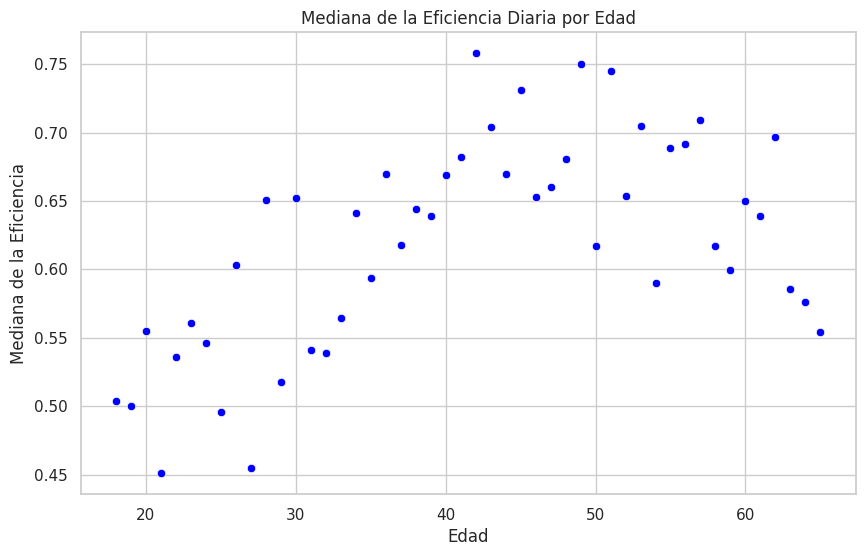

In [ ]:
# Calculamos la mediana de la eficiencia por edad
mediana_eficacia_por_edad = df.groupby('sub_age')['actual_efficacy_h'].median().reset_index()

# Graficamos los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mediana_eficacia_por_edad, x='sub_age', y='actual_efficacy_h', marker='o', color='blue')
plt.title('Mediana de la Eficiencia Diaria por Edad')
plt.xlabel('Edad')
plt.ylabel('Mediana de la Eficiencia')
plt.grid(True)
plt.show()



Interpretación
La edad influye de tal forma que los más jovenes en la empresa tienen una menor eficiencia, que mientras pasan los años crece paulatinamente hasta un pico entre los 45 - 50 años, luego decae hasta los 64 pero no decae tanto la eficiencia como el caso de los más jóvenes

Salud vs Eficacia

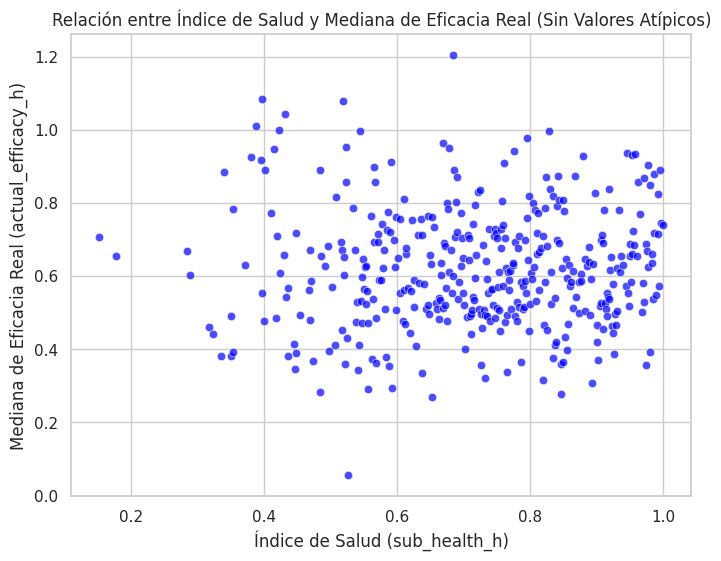

Correlación entre Índice de Salud y Mediana de Eficacia Real: 0.02


In [ ]:
# Calcular los percentiles 1% y 99% de actual_efficacy_h
limite_inferior = df['actual_efficacy_h'].quantile(0.01)
limite_superior = df['actual_efficacy_h'].quantile(0.99)

# Filtrar los datos para eliminar valores atípicos
df_filtrado = df[(df['actual_efficacy_h'] >= limite_inferior) & (df['actual_efficacy_h'] <= limite_superior)]

# Calcular la mediana de la eficacia por índice de salud en los datos filtrados
mediana_eficacia_por_salud = df_filtrado.groupby('sub_health_h')['actual_efficacy_h'].median().reset_index()

# Gráfico de dispersión entre sub_health_h y la mediana de actual_efficacy_h
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sub_health_h', y='actual_efficacy_h', data=mediana_eficacia_por_salud, alpha=0.7, color='blue')
plt.title('Relación entre Índice de Salud y Mediana de Eficacia Real (Sin Valores Atípicos)')
plt.xlabel('Índice de Salud (sub_health_h)')
plt.ylabel('Mediana de Eficacia Real (actual_efficacy_h)')
plt.show()

# Calcular la correlación entre sub_health_h y la mediana de actual_efficacy_h
correlacion = mediana_eficacia_por_salud['sub_health_h'].corr(mediana_eficacia_por_salud['actual_efficacy_h'])
print(f"Correlación entre Índice de Salud y Mediana de Eficacia Real: {correlacion:.2f}")

Interpretación

No existe relación entre la eficacia y la salud del empleado, en este caso se filtró valores atipicos fuera del 1% y el 99% pero el gráfico no cambió. Se concluye que no hay relación entre el índice de salud y la eficacia

Si la empresa está interesada en aumentar la eficacia de sus trabajadores dentro de la empresa, se sugiere no enfocarse en la salud de los trabajadores y ver que conclusiones se pueden llegar con otros parámetros, como el salario, el supervisor, compromiso, experiencia. Compromiso y experiencia se espera que influya en la eficacia, pero es importante determinar cuánto influye y cuál es o cuáles son las carácterísticas que más atención tiene que prestar la empresa si quiere aumentar la eficacia de sus empleados

Eficacia y las fechas de trabajo

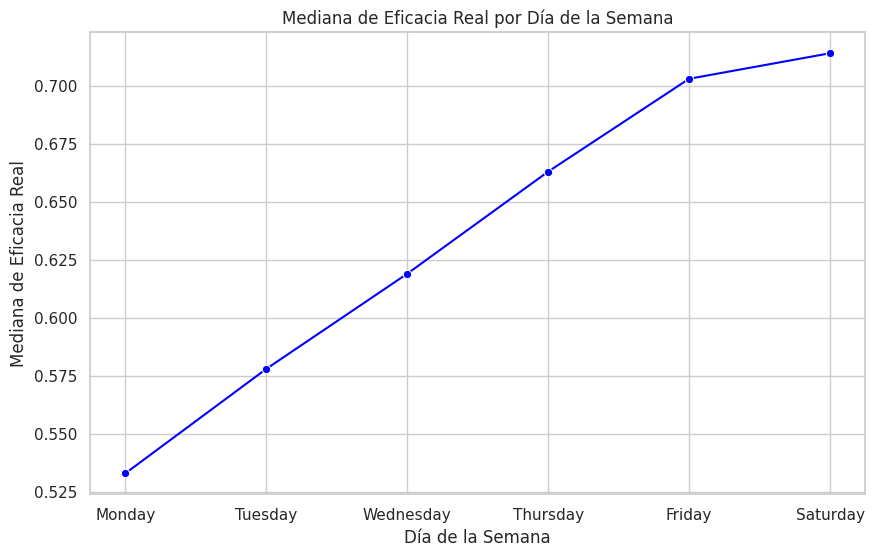

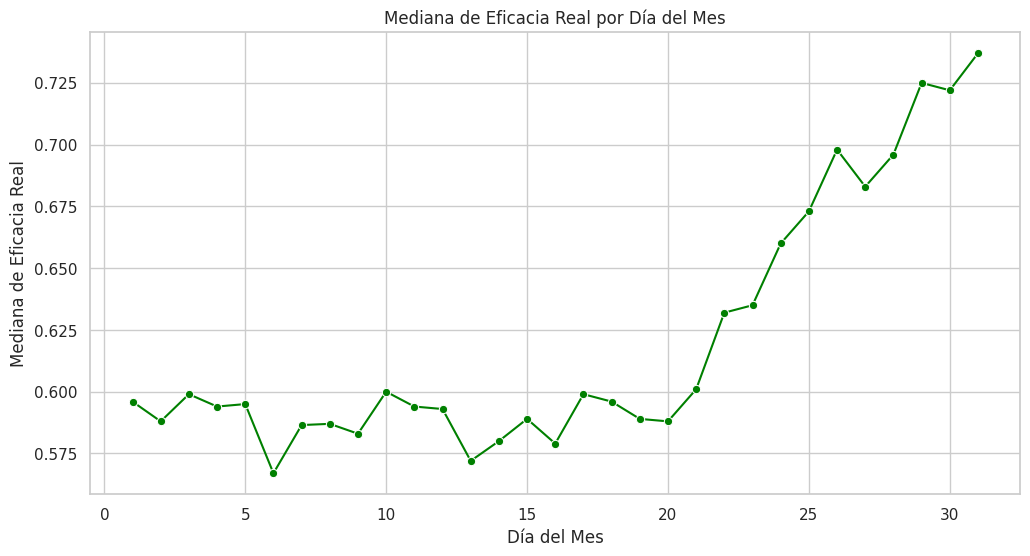

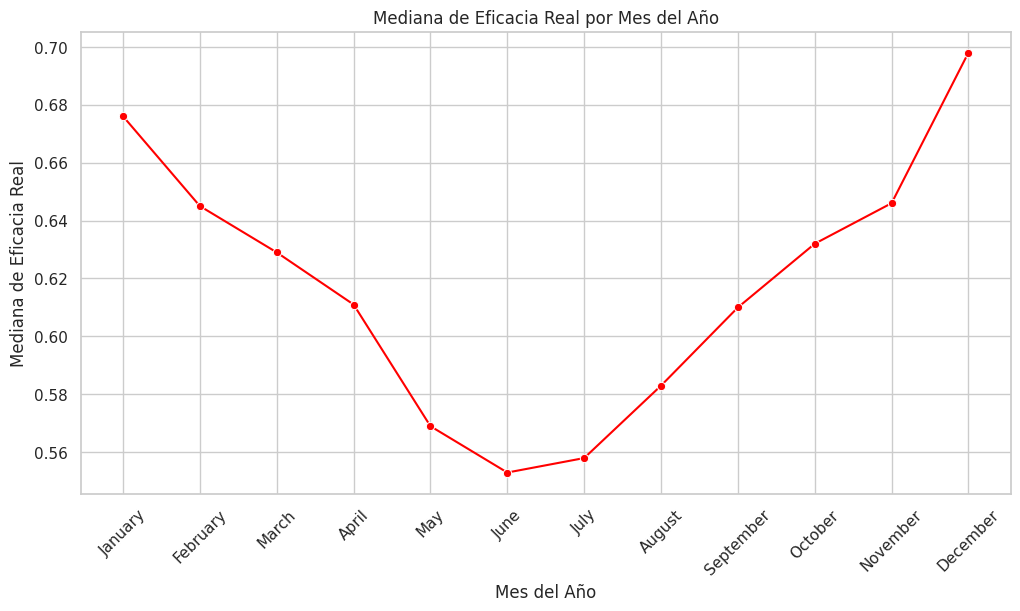

In [ ]:
# convirtiendo la columna de fecha a tipo datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Crear las columnas 'day_of_week', 'day_of_month' y 'month' a partir de 'event_date'
df['day_of_week'] = df['event_date'].dt.strftime('%A')  # Día de la semana (nombre completo)
df['day_of_month'] = df['event_date'].dt.day  # Día del mes
df['month'] = df['event_date'].dt.strftime('%B')  # Mes (nombre completo)

# Eficacia promedio por día de la semana
eficacia_por_dia_semana = df.groupby('day_of_week')['actual_efficacy_h'].median().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Gráfico de eficacia por día de la semana
plt.figure(figsize=(10, 6))
sns.lineplot(x=eficacia_por_dia_semana.index, y=eficacia_por_dia_semana.values, marker='o', color='blue')
plt.title('Mediana de Eficacia Real por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Mediana de Eficacia Real')
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.show()

# Eficacia promedio por día del mes
eficacia_por_dia_mes = df.groupby('day_of_month')['actual_efficacy_h'].median()

# Gráfico de eficacia por día del mes
plt.figure(figsize=(12, 6))
sns.lineplot(x=eficacia_por_dia_mes.index, y=eficacia_por_dia_mes.values, marker='o', color='green')
plt.title('Mediana de Eficacia Real por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Mediana de Eficacia Real')
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.show()

# Eficacia promedio por mes del año
eficacia_por_mes = df.groupby('month')['actual_efficacy_h'].median().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Gráfico de eficacia por mes del año
plt.figure(figsize=(12, 6))
sns.lineplot(x=eficacia_por_mes.index, y=eficacia_por_mes.values, marker='o', color='red')
plt.title('Mediana de Eficacia Real por Mes del Año')
plt.xlabel('Mes del Año')
plt.ylabel('Mediana de Eficacia Real')
plt.grid(True)  # Agregar una cuadrícula para mejor visualización
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.show()


Interpretación

- Analizar por qué la eficacia crece paulatinamente a lo largo de la semana, ¿mayor motivación? ¿Mayor demanda laboral? Ver en profundidad qué es lo que pasa en la empresa que se determina un crecimiento a medida que transcurre la semana
- La eficacia por día del mes lo mismo, mayor profundidad en el rubro de la empresa puede dar más respuestas
- A lo largo del año, puede variar por vacaciones de la empresa, y los picos en los extremos puede indicar periodos de aumento en las ventas de la empresa por lo que la demanda a los trabajadores aumenta para cumplir plazos


Se consideró nuevamente la mediana al ser más robusta frente a valores atípicos
Veamos la eficacia según diferencia de edad entre supervisores y trabajadores


Veamos como influye en la eficacia de los trabajadores la diferencia de edad entre el supervisor y los operarios

In [ ]:
# Preparando los datos
# Filtrar solo eventos de Efficacy (para enfocarnos en registros con datos de eficacia)
df_efficacy = df[df['behav_comptype_h'] == 'Efficacy'].copy()

# Eliminar filas donde falten valores en las columnas clave (evitar errores en el análisis)
df_efficacy = df_efficacy.dropna(subset=['actual_efficacy_h', 'sup_sub_age_diff'])

# Crear categorías de diferencia de edad para agrupar y visualizar mejor los datos
df_efficacy['age_diff_category'] = pd.cut(
    df_efficacy['sup_sub_age_diff'],  # Columna numérica a categorizar
    bins=[-60, -20, -10, 0, 10, 20, 60],  # Límites de los rangos de edad
    labels=['Sup. Mucho Mayor', 'Sup. Mayor', 'Sup. Levemente Mayor', 'Misma Edad', 'Sup. Levemente Menor', 'Sup. Mucho Menor']  # Etiquetas legibles
)

In [ ]:
# Estadísticas descriptivas (media, percentiles, etc.) de eficacia por grupo de edad
print(df_efficacy.groupby('age_diff_category')['actual_efficacy_h'].describe())

# Calcular correlación entre diferencia de edad y eficacia (rango: -1 a 1)
correlation = df_efficacy['sup_sub_age_diff'].corr(df_efficacy['actual_efficacy_h'])
print(f"\nCorrelación entre diferencia de edad y eficacia: {correlation:.3f}")  # 0 = no relación lineal

                        count      mean       std  min      25%    50%    75%    max
age_diff_category                                                                   
Sup. Mucho Mayor      39364.0  0.604433  0.402544  0.0  0.32575  0.535  0.812  3.736
Sup. Mayor            28566.0  0.710519  0.349877  0.0  0.47700  0.654  0.885  3.037
Sup. Levemente Mayor  31659.0  0.766796  0.394148  0.0  0.51000  0.707  0.969  3.416
Misma Edad            39060.0  0.771239  0.394781  0.0  0.51500  0.714  0.975  3.763
Sup. Levemente Menor  22829.0  0.641852  0.384510  0.0  0.40400  0.586  0.822  3.473
Sup. Mucho Menor      29794.0  0.497989  0.366898  0.0  0.25000  0.439  0.675  2.944

Correlación entre diferencia de edad y eficacia: -0.056


<ipython-input-120-a851cf5c207c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_efficacy.groupby('age_diff_category')['actual_efficacy_h'].describe())


<ipython-input-121-e315854b0db6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


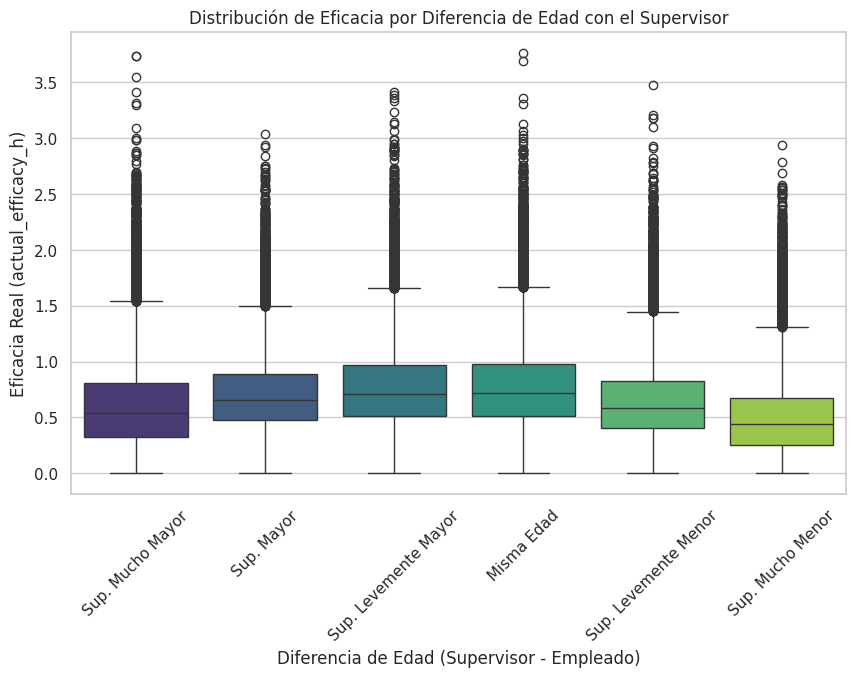

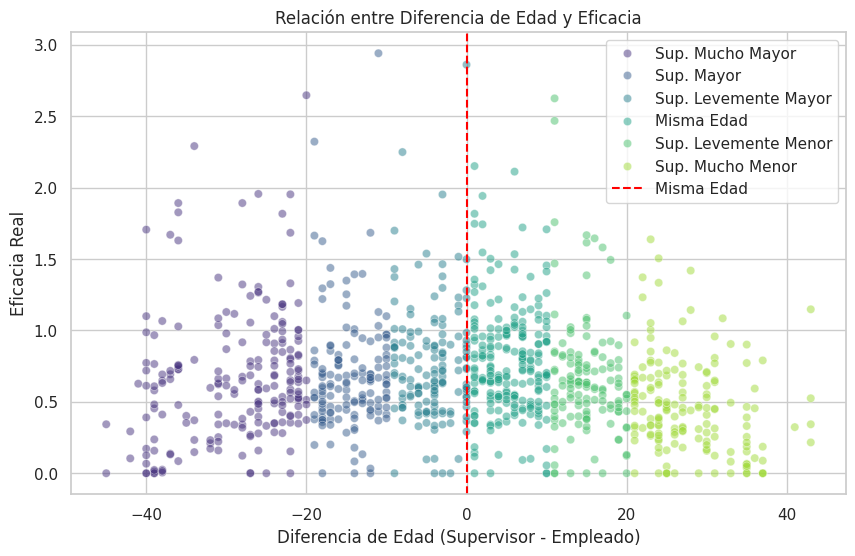

In [ ]:
# Visualización
# Boxplot: Distribución de eficacia por categoría de diferencia de edad
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.boxplot(
    data=df_efficacy,  # DataFrame a usar
    x='age_diff_category',  # Eje X: categorías de edad
    y='actual_efficacy_h',  # Eje Y: eficacia
    order=['Sup. Mucho Mayor', 'Sup. Mayor', 'Sup. Levemente Mayor', 'Misma Edad', 'Sup. Levemente Menor', 'Sup. Mucho Menor'],  # Orden personalizado
    palette='viridis'  # Esquema de colores
)
plt.title('Distribución de Eficacia por Diferencia de Edad con el Supervisor')
plt.xlabel('Diferencia de Edad (Supervisor - Empleado)')
plt.ylabel('Eficacia Real (actual_efficacy_h)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para legibilidad
plt.show()

# Scatter plot: Relación numérica entre diferencia de edad y eficacia (muestra aleatoria de 1000 puntos para evitar saturación)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_efficacy.sample(1000, random_state=42),  # Muestra aleatoria reproducible
    x='sup_sub_age_diff',  # Eje X: diferencia de edad numérica
    y='actual_efficacy_h',  # Eje Y: eficacia
    alpha=0.5,  # Transparencia para ver superposición de puntos
    hue='age_diff_category',  # Color por categoría de edad
    palette='viridis'  # Mismo esquema de colores que el boxplot
)
plt.title('Relación entre Diferencia de Edad y Eficacia')
plt.xlabel('Diferencia de Edad (Supervisor - Empleado)')
plt.ylabel('Eficacia Real')
plt.axvline(0, color='red', linestyle='--', label='Misma Edad')  # Línea vertical en diferencia=0
plt.legend()
plt.show()

Interpretación:

- La eficiencia laboral es menor para mayor diferencia generacioanl, siendo menor en cuando el supervisor en mucho más joven que los trabajadores.
- Mi sugerencia es evitar lo más posible la brecha generacional, si hay trabajadores que no están respondiendo bien, moverlos a sectores donde el supervisor posee una edad similar o algo mayor.
- Lo mismo a la inversa, si un supervisor está teniendo difucultados constantemente, uno de los motivos principales puede ser que es muy joven o muy mayor para sus trabajadores, mi sugerencia sería probar como funciona en otro sector que tengan edades más cercanas con los operarios, y en lo posible algo mayor en comparación a los trabajadores

Veamos si hay relación entre el compromismo del trabajador y renuncias

In [ ]:
# Seleccionar columnas relevantes y eliminar duplicados (manteniendo el primer registro por empleado)
empleados_compromiso = df[['sub_ID', 'sub_fname', 'sub_lname', 'sub_commitment_h']].drop_duplicates(subset='sub_ID')

# Mostrar las primeras 10 filas
print(empleados_compromiso.head(10))

      sub_ID  sub_fname  sub_lname  sub_commitment_h
0   98000001    Rebecca      Bauer             1.000
2   98000002       Joan     Winter             0.563
4   98000003  Elizabeth   Martinez             0.907
7   98000004      Alice  Zimmerman             0.819
9   98000005      Karen      Bauer             0.629
11  98000006  Elizabeth   Robinson             0.682
13  98000007     Harold     Taylor             0.553
15  98000008     Nathan     Garcia             0.649
17  98000009    Michael      Young             0.557
19  98000010      Jason      Patel             0.683


In [ ]:
# Ordenar de menor a mayor compromiso (para identificar empleados con bajo compromiso)
empleados_compromiso_sorted = empleados_compromiso.sort_values(by='sub_commitment_h', ascending=True)

# Mostrar los 15 empleados con menor compromiso
print(empleados_compromiso_sorted.head(15))

          sub_ID    sub_fname  sub_lname  sub_commitment_h
254481  98000724     Margaret     Suzuki             0.172
474     98000278  Christopher      Vogel             0.271
77      98000042       Joshua     Winter             0.274
136     98000076      Michael       Dahl             0.313
607     98000353      Juanita   Beaumont             0.318
990     98000575        Tonya   Anderson             0.325
157     98000090      Melissa   Phillips             0.333
5275    98000616      Phillip      Olson             0.355
645     98000376        Emily     Nguyen             0.372
198     98000116       Martin      Fiore             0.374
960     98000559         Paul      Novak             0.383
279     98000167        Nancy   Williams             0.391
571     98000333      Jeffrey  Hernandez             0.396
750     98000434       Nicole   Beaumont             0.410
528     98000306      Barbara      Vogel             0.414


In [ ]:
# Filtrar solo eventos de Resignation (renuncias) y limpiar datos
df_resignations = df[df['behav_comptype_h'] == 'Resignation'].copy()  # Solo filas con renuncias
df_resignations = df_resignations.dropna(subset=['sub_commitment_h'])  # Eliminar filas sin dato de compromiso

# Crear columna binaria: 1 si renunció, 0 si no (para comparar con empleados activos)
df['is_resigned'] = (df['behav_comptype_h'] == 'Resignation').astype(int)

In [ ]:
# Comparar el compromiso promedio entre renuncias vs. no renuncias
commitment_comparison = df.groupby('is_resigned')['sub_commitment_h'].mean()
print(f"Compromiso promedio:\nRenunciaron: {commitment_comparison[1]:.3f}\nNo renunciaron: {commitment_comparison[0]:.3f}")

# Test estadístico (t-test) para ver si la diferencia es significativa
from scipy.stats import ttest_ind
group_resigned = df[df['is_resigned'] == 1]['sub_commitment_h']
group_active = df[df['is_resigned'] == 0]['sub_commitment_h']
t_stat, p_value = ttest_ind(group_resigned, group_active, nan_policy='omit')
print(f"\nT-test: p-value = {p_value:.4f} (valores < 0.05 indican diferencia significativa)")

Compromiso promedio:
Renunciaron: 0.732
No renunciaron: 0.752

T-test: p-value = 0.2333 (valores < 0.05 indican diferencia significativa)


sub_role
Laborer        75
Team Leader     2
Name: count, dtype: int64


<ipython-input-126-ff8b59edc523>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


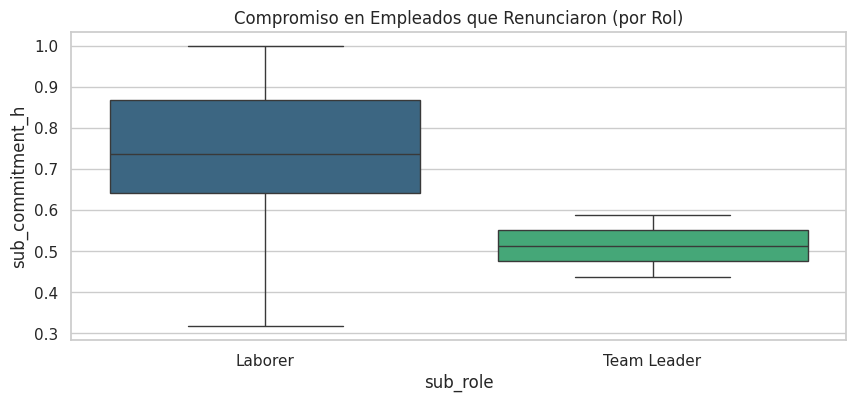

In [ ]:
# Ver distribución de renuncias por rol
print(df[df['is_resigned'] == 1]['sub_role'].value_counts())

# Comparar compromiso en renuncias por rol
plt.figure(figsize=(10, 4))
sns.boxplot(
    data=df[df['is_resigned'] == 1],
    x='sub_role',
    y='sub_commitment_h',
    palette='viridis'
)
plt.title('Compromiso en Empleados que Renunciaron (por Rol)')
plt.show()

Interpretación

- El bajo compromiso no es un predictor significativo dentro de la empresa para detectar posibles renuncias, por lo menos para los Operarios, pero veamos el caso de los Lideres, que los que renunciaron su compromiso era menor.

- Se filtra solo Team leders
- Para los que renunciaron (Resignation), tomar sus últimos 10 registros de compromiso antes de la renuncia.

- Comparar con el compromiso de Team Leaders que no renunciaron (usando sus últimos 10 registros disponibles).

In [ ]:
# 1. Filtrar Team Leaders y ordenar por fecha
team_leaders = df[df['sub_role'] == 'Team Leader'].copy()
team_leaders['event_date'] = pd.to_datetime(team_leaders['event_date'])  # Asegurar que es datetime
team_leaders = team_leaders.sort_values(['sub_ID', 'event_date'])

# 2. Para los que renunciaron: últimos 10 registros antes de la renuncia
resigned_tl = team_leaders[team_leaders['behav_comptype_h'] == 'Resignation']['sub_ID'].unique()
last_records_resigned = team_leaders[team_leaders['sub_ID'].isin(resigned_tl)].groupby('sub_ID').tail(10)

# 3. Para los que NO renunciaron: últimos 10 registros disponibles
active_tl = team_leaders[~team_leaders['sub_ID'].isin(resigned_tl)]
last_records_active = active_tl.groupby('sub_ID').tail(10)

# Calcular promedio de compromiso en ambos grupos
mean_resigned = last_records_resigned['sub_commitment_h'].mean()
mean_active = last_records_active['sub_commitment_h'].mean()

print(f"Compromiso promedio (últimos 10 registros):")
print(f"- Team Leaders que renunciaron: {mean_resigned:.3f}")
print(f"- Team Leaders activos: {mean_active:.3f}")

# Test de significancia estadística
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(
    last_records_resigned['sub_commitment_h'].dropna(),
    last_records_active['sub_commitment_h'].dropna(),
    equal_var=False
)
print(f"\nT-test: p-value = {p_value:.4f}")

Compromiso promedio (últimos 10 registros):
- Team Leaders que renunciaron: 0.513
- Team Leaders activos: 0.746

T-test: p-value = 0.0000


Si se observa un menor compromiso por parte de los Team Leaders que renunciaron, en sus últimos registros

Pero es necesario conocer la cantidad de renuncias, ya que valores bajos de renuncia no nos permite sacar ninguna conclusión, en cambio para una empresa de alta rotación si se podrían realizar predicciones de posibles renuncias por parte de los Team Leaders, recordar que el período es solo de 18 meses



In [ ]:
# 1. Identificar empleados únicos y su último estado (activo o renunció)
# Asumimos que 'behav_comptype_h' = 'Resignation' marca la renuncia

# Obtener la última fecha de registro por empleado
last_status = df.sort_values('event_date').groupby('sub_ID').tail(1)

# Contar empleados activos vs. renunciados
total_activos = len(last_status[last_status['behav_comptype_h'] != 'Resignation'])
total_renunciaron = len(last_status[last_status['behav_comptype_h'] == 'Resignation'])

print(f"Total de empleados únicos en el dataset: {len(last_status)}")
print(f"Empleados activos hasta la última fecha: {total_activos}")
print(f"Empleados que renunciaron: {total_renunciaron}")
print(f"Tasa de rotación: {total_renunciaron / len(last_status):.2%}")

Total de empleados únicos en el dataset: 687
Empleados activos hasta la última fecha: 654
Empleados que renunciaron: 33
Tasa de rotación: 4.80%


In [ ]:
# Filtrar solo Team Leaders
team_leaders_last_status = last_status[last_status['sub_role'] == 'Team Leader']

# Contar TL activos vs. renunciados
tl_activos = len(team_leaders_last_status[team_leaders_last_status['behav_comptype_h'] != 'Resignation'])
tl_renunciaron = len(team_leaders_last_status[team_leaders_last_status['behav_comptype_h'] == 'Resignation'])

print(f"\nPara Team Leaders específicamente:")
print(f"Total Team Leaders únicos: {len(team_leaders_last_status)}")
print(f"Team Leaders activos: {tl_activos}")
print(f"Team Leaders que renunciaron: {tl_renunciaron}")
print(f"Tasa de rotación de TL: {tl_renunciaron / len(team_leaders_last_status):.2%}")


Para Team Leaders específicamente:
Total Team Leaders únicos: 29
Team Leaders activos: 28
Team Leaders que renunciaron: 1
Tasa de rotación de TL: 3.45%


Efectivamente la tasa de renuncia es baja, y en Team eaders una sola en 18 meses, siendo solo del 4,8% para los operarios

Quizás hay patrones ocultos en estos 33 operarios que renunciaron, que nos permiten hacer predeciones para futuras renuncias

Para ello se analiza:
- Su eficacia promedio en los últimos 50 registros
- Su variabilidad de eficacia en los últimos 50 registros
- Cantidad de ausencias
- Compromiso y comportamiento

Para todo ello se utiliza la matriz de correlación


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo Laborers y quedarnos con sus últimos 50 registros antes de la renuncia (o todos si no renunciaron)
df_laborers = df[df['sub_role'] == 'Laborer'].copy()

# Para cada Laborer, obtener sus últimos 50 registros (o todos si tienen menos)
last_50_records = df_laborers.groupby('sub_ID').tail(50)

# Identificar los 33 que renunciaron
resigned_ids = df_laborers[df_laborers['behav_comptype_h'] == 'Resignation']['sub_ID'].unique()

In [ ]:
# Crear un DataFrame con métricas agregadas para cada Laborer
metrics = last_50_records.groupby('sub_ID').agg({
    'actual_efficacy_h': ['mean', 'std'],  # Eficacia promedio y variabilidad
    'sub_commitment_h': 'mean',            # Compromiso promedio
    'behav_comptype_h': lambda x: (x == 'Absence').sum(),  # Total de ausencias
    'recorded_efficacy': lambda x: (x - x.mean()).mean()   # Discrepancia vs eficacia registrada
}).reset_index()

# Renombrar columnas
metrics.columns = ['sub_ID', 'eff_mean', 'eff_std', 'commit_mean', 'absences', 'efficacy_discrepancy']

# Añadir columna "renunció" (1: Sí, 0: No)
metrics['resigned'] = metrics['sub_ID'].isin(resigned_ids).astype(int)

Correlación con renuncia:
resigned                1.000000
eff_mean                0.299530
eff_std                 0.157941
sub_ID                  0.085352
efficacy_discrepancy    0.041915
commit_mean            -0.022717
absences               -0.077322
Name: resigned, dtype: float64


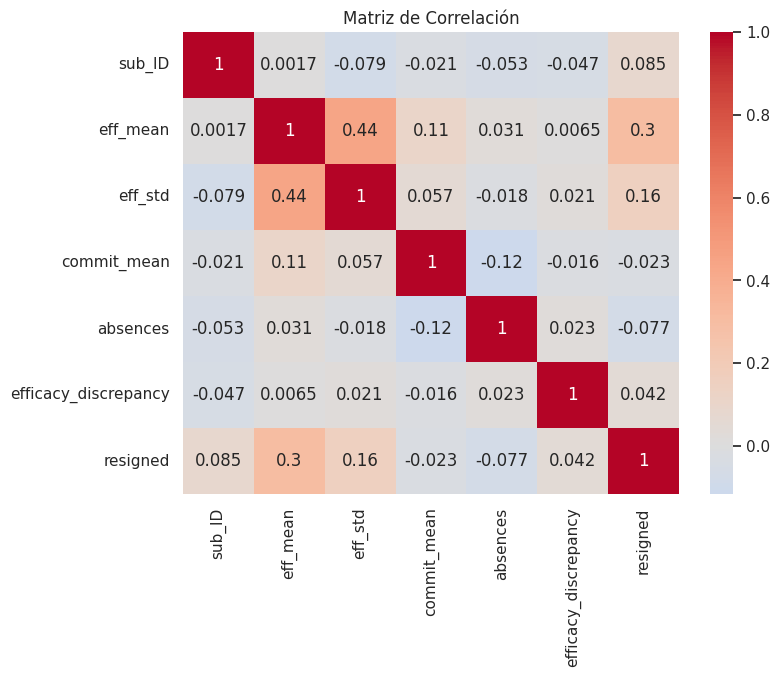

In [ ]:
# Calcular correlaciones con la variable "resigned"
correlation_matrix = metrics.corr(numeric_only=True)

# Filtrar solo correlaciones con "resigned"
resigned_corr = correlation_matrix['resigned'].sort_values(ascending=False)

print("Correlación con renuncia:")
print(resigned_corr)

# Visualizar matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

Interpretación:

- La efficiencia media, da un indicativo de que un bajo desempeño procede a la renuncia
- Una alta variabilidad en la efficiencia podría indicar inonsistencia en el operiaro, con días muy buenos y días muy malos.
- Se toma de registros los últimos 40 datos considerandolos como los más relevantes, para determinar si los ultimos períodos se puede ver posibilidad de renuncia por parte del empleado

<ipython-input-134-4dbf606b82cb>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-134-4dbf606b82cb>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


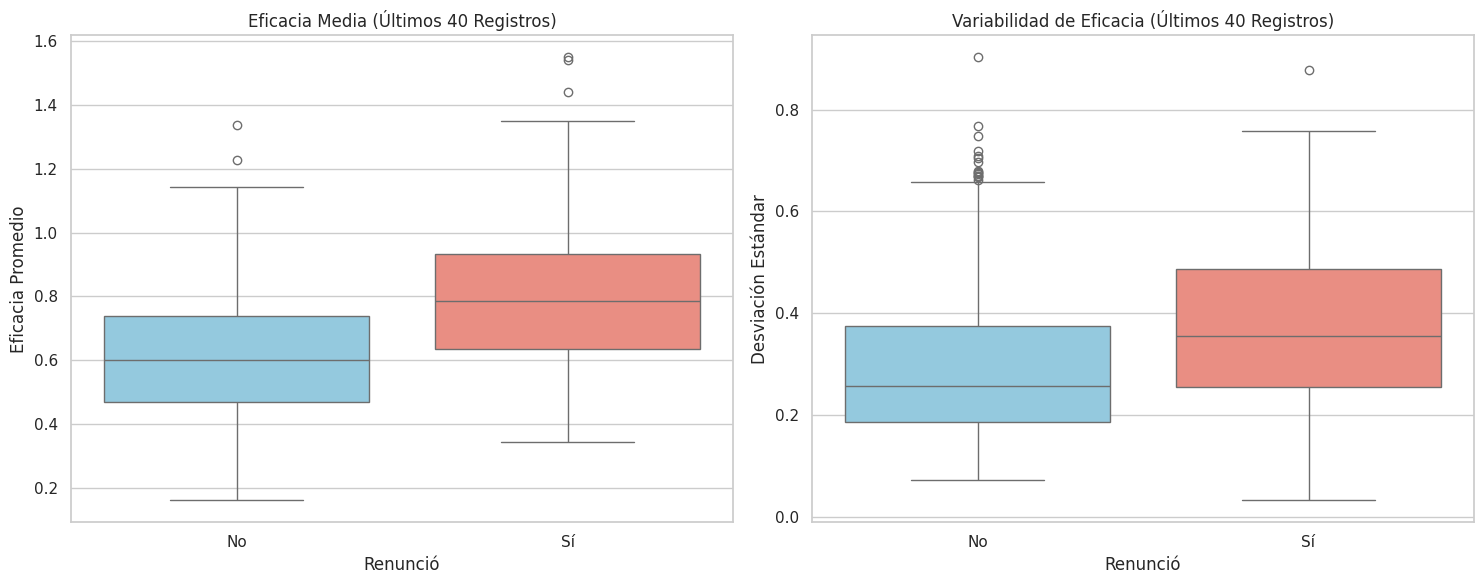

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo visual
sns.set(style="whitegrid")

# 1. Filtrar Laborers y obtener últimos 40 registros por empleado
df_laborers = df[df['sub_role'] == 'Laborer'].copy()
last_40_records = df_laborers.groupby('sub_ID').tail(40)

# 2. Calcular eficacia media y desviación estándar
metrics = last_40_records.groupby('sub_ID').agg({
    'actual_efficacy_h': ['mean', 'std'],
    'behav_comptype_h': lambda x: (x == 'Resignation').any()  # ¿Renunció?
}).reset_index()

metrics.columns = ['sub_ID', 'eff_mean', 'eff_std', 'resigned']

# Convertir booleanos a strings para evitar errores con la paleta
metrics['resigned_str'] = metrics['resigned'].map({True: 'Sí', False: 'No'})

# 3. Crear gráficos comparativos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Eficacia Media
sns.boxplot(
    data=metrics,
    x='resigned_str',  # Usar la columna convertida a strings
    y='eff_mean',
    palette={'No': 'skyblue', 'Sí': 'salmon'},  # Paleta con strings
    ax=axes[0]
)
axes[0].set_title('Eficacia Media (Últimos 40 Registros)')
axes[0].set_xlabel('Renunció')
axes[0].set_ylabel('Eficacia Promedio')

# Gráfico 2: Variabilidad de Eficacia (Desviación Estándar)
sns.boxplot(
    data=metrics,
    x='resigned_str',  # Usar la columna convertida a strings
    y='eff_std',
    palette={'No': 'skyblue', 'Sí': 'salmon'},  # Paleta con strings
    ax=axes[1]
)
axes[1].set_title('Variabilidad de Eficacia (Últimos 40 Registros)')
axes[1].set_xlabel('Renunció')
axes[1].set_ylabel('Desviación Estándar')

plt.tight_layout()
plt.show()

Interpretación

- Eficiencia media, no hay un indicio respecto a los que renunciaron

- Varuabilidad en la eficiencia, hay una tendencia que la variabilidad es mayor para aquellos que renuncian, pero sería bueno identificar más patrones con el resto de columnas del dataset, veamos las ausencias en los ultimos días de trabajo, quizás estas aumentan en operarios que están a punto de renunciar

In [ ]:
# Filtrar solo Laborers
df_laborers = df[df['sub_role'] == 'Laborer']

# Cantidad total de Laborers únicos
total_laborers = df_laborers['sub_ID'].nunique()

# Filtrar los que renunciaron
resigned_laborers = df_laborers[df_laborers['behav_comptype_h'] == 'Resignation']

# Cantidad de Laborers únicos que renunciaron
cantidad_renuncias = resigned_laborers['sub_ID'].nunique()

# Porcentaje de renuncias
porcentaje_renuncias = (cantidad_renuncias / total_laborers) * 100

# Mostrar resultados
print(f"Total de Laborers: {total_laborers}")
print(f"Laborers que renunciaron: {cantidad_renuncias}")
print(f"Porcentaje de Laborers que renunciaron: {porcentaje_renuncias:.2f}%")


Total de Laborers: 654
Laborers que renunciaron: 75
Porcentaje de Laborers que renunciaron: 11.47%


<ipython-input-136-b6d4ee3b34e2>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_30 = df_laborers.groupby('sub_ID').apply(last_30_days).reset_index(drop=True)
<ipython-input-136-b6d4ee3b34e2>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=absence_per_person, x='resigned', y='absences', estimator='mean', ci='sd', palette='Set2')
<ipython-input-136-b6d4ee3b34e2>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=absence_per_person, x='resigned', y='absences', estimator='m

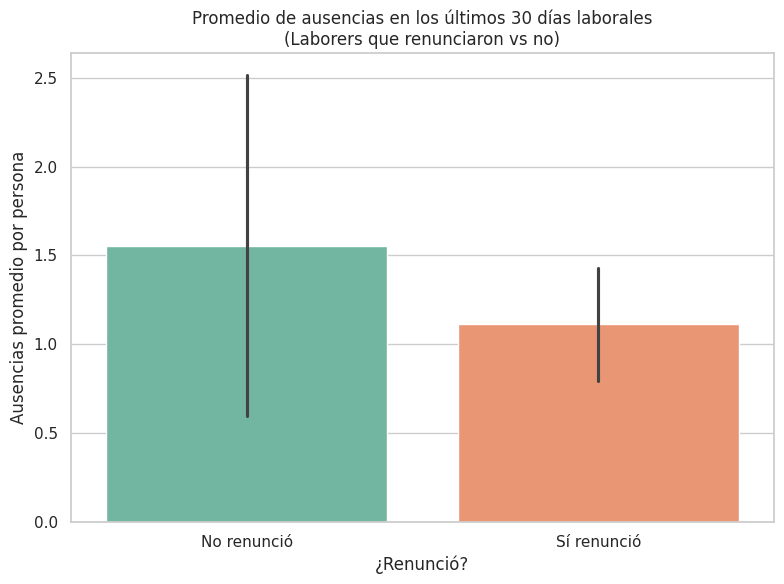

In [ ]:
# Asegurar que la fecha es datetime
df['event_date'] = pd.to_datetime(df['event_date'])

# Filtrar solo Laborers
df_laborers = df[df['sub_role'] == 'Laborer'].copy()

# Marcar si renunciaron
resigned_ids = df_laborers[df_laborers['behav_comptype_h'] == 'Resignation']['sub_ID'].unique()
df_laborers['resigned'] = df_laborers['sub_ID'].isin(resigned_ids)

# Ordenar por persona y fecha
df_laborers = df_laborers.sort_values(['sub_ID', 'event_date'])

# Tomar los últimos 30 días laborales de cada trabajador
def last_30_days(group):
    return group.tail(30)

last_30 = df_laborers.groupby('sub_ID').apply(last_30_days).reset_index(drop=True)

# Contar ausencias por persona en sus últimos 30 días
absence_per_person = last_30[last_30['behav_comptype_h'] == 'Absence'].groupby('sub_ID').size().reset_index(name='absences')

# Añadir si renunció o no
absence_per_person['resigned'] = absence_per_person['sub_ID'].isin(resigned_ids)
absence_per_person['resigned'] = absence_per_person['resigned'].map({True: 'Sí renunció', False: 'No renunció'})

# Gráfico del promedio de ausencias
plt.figure(figsize=(8, 6))
sns.barplot(data=absence_per_person, x='resigned', y='absences', estimator='mean', ci='sd', palette='Set2')
plt.title('Promedio de ausencias en los últimos 30 días laborales\n(Laborers que renunciaron vs no)')
plt.ylabel('Ausencias promedio por persona')
plt.xlabel('¿Renunció?')
plt.tight_layout()
plt.show()


Interpretación


Con la información proporcionada sobre las ausencias previas, no es posible realizar predicciones respecto a renuncias de operarios
Solo para asegurar que esto es cierto, se calcula la cantidad de ausencias de los operarios que renunciaron para un período de 30 días habiles anteriores a la renuncia

In [ ]:
import pandas as pd

# Asegurar formato de fecha
df['event_date'] = pd.to_datetime(df['event_date'])

# Filtrar laborers que renunciaron
df_laborers = df[df['sub_role'] == 'Laborer'].copy()
df_resigned = df_laborers[df_laborers['behav_comptype_h'] == 'Resignation'].copy()

# Obtener última fecha de renuncia por sub_ID
resign_dates = df_resigned.groupby('sub_ID')['event_date'].max().reset_index()
resign_dates.columns = ['sub_ID', 'resign_date']

# Unir con todo el dataset de laborers
df_laborers = df_laborers.merge(resign_dates, on='sub_ID', how='left')

# Filtrar los eventos ocurridos en los 30 días previos a la renuncia
df_laborers['in_30_day_window'] = (df_laborers['event_date'] >= df_laborers['resign_date'] - pd.Timedelta(days=30)) & \
                                  (df_laborers['event_date'] < df_laborers['resign_date'])

# Filtrar solo ausencias en ese período
ausencias_30dias = df_laborers[(df_laborers['in_30_day_window']) & (df_laborers['behav_comptype_h'] == 'Absence')]

# Contar ausencias por sub_ID
ausencias_por_trabajador = ausencias_30dias.groupby('sub_ID').size().reset_index(name='cant_ausencias')

# Obtener estadísticas
promedio_ausencias = ausencias_por_trabajador['cant_ausencias'].mean()
max_ausencias = ausencias_por_trabajador['cant_ausencias'].max()
min_ausencias = ausencias_por_trabajador['cant_ausencias'].min()
id_max = ausencias_por_trabajador.loc[ausencias_por_trabajador['cant_ausencias'].idxmax(), 'sub_ID']
id_min = ausencias_por_trabajador.loc[ausencias_por_trabajador['cant_ausencias'].idxmin(), 'sub_ID']

# Mostrar resultados
print(f"Promedio de ausencias en los 30 días previos a la renuncia: {promedio_ausencias:.2f}")
print(f"Máximo de ausencias: {max_ausencias} (sub_ID: {id_max})")
print(f"Mínimo de ausencias: {min_ausencias} (sub_ID: {id_min})")


Promedio de ausencias en los 30 días previos a la renuncia: 1.41
Máximo de ausencias: 3 (sub_ID: 98000173)
Mínimo de ausencias: 1 (sub_ID: 98000040)


Interpretación:

1,41 faltas promedio en 30 días no da un patrón fuerte como para hacer predicciones, se busca si los eventos negativos pueden aportar algo más

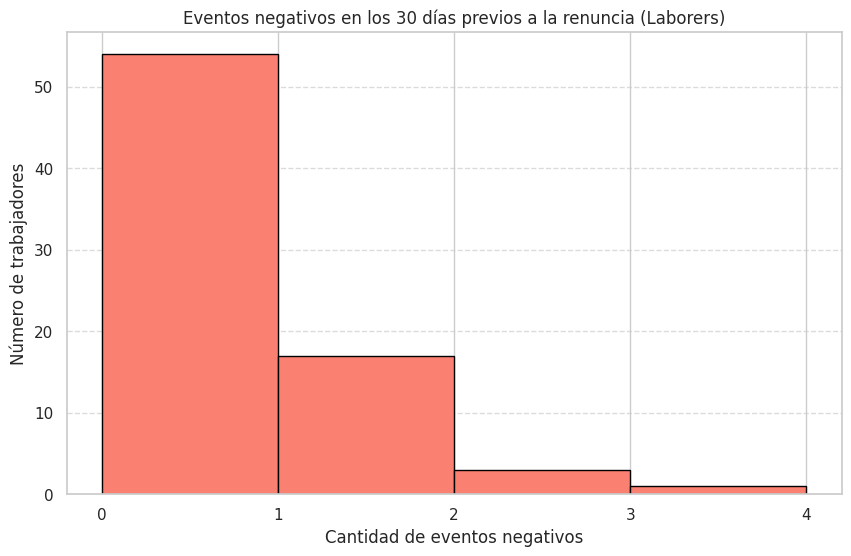

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir eventos negativos
eventos_negativos = ['Disruption', 'Slip', 'Lapse', 'Sabotage']

# Filtrar solo Laborers que renunciaron
laborers_renunciaron = df[(df['sub_role'] == 'Laborer') & (df['behav_comptype_h'] == 'Resignation')].copy()

# Asegurar nuevamente que la columna de fecha esté en formato datetime
df['event_date'] = pd.to_datetime(df['event_date'])
laborers_renunciaron['event_date'] = pd.to_datetime(laborers_renunciaron['event_date'])

# Crear lista para guardar los conteos
conteo_eventos_negativos = []

# Recorrer cada ID de renunciante
for sub_id in laborers_renunciaron['sub_ID'].unique():
    # Obtener fecha de renuncia
    fecha_renuncia = laborers_renunciaron[laborers_renunciaron['sub_ID'] == sub_id]['event_date'].max()

    # Filtrar eventos negativos de ese trabajador dentro de los 30 días previos
    eventos_previos = df[
        (df['sub_ID'] == sub_id) &
        (df['event_date'] >= (fecha_renuncia - pd.Timedelta(days=30))) &
        (df['event_date'] < fecha_renuncia) &
        (df['behav_comptype_h'].isin(eventos_negativos))
    ]

    # Guardar la cantidad
    conteo_eventos_negativos.append(len(eventos_previos))

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(conteo_eventos_negativos, bins=range(0, max(conteo_eventos_negativos)+2), color='salmon', edgecolor='black')
plt.title('Eventos negativos en los 30 días previos a la renuncia (Laborers)')
plt.xlabel('Cantidad de eventos negativos')
plt.ylabel('Número de trabajadores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, max(conteo_eventos_negativos)+2))
plt.show()


Interpretación:

- Con la información proporcionada, no es posible realizar predicciones respecto a renuncias de operarios


- Se analiza una predicción de la eficacia diaria solo de los laborers, al ser una variable numérica, algún tipo de predicción del tipo regresión podría ser útil, hasta el analisis relaizado, se sabe que los operarios que están entre 40 y 50 tienen en promedio más eficacia, y por día de la semana, la eficacia va incrementando a medida que va desde lunes hasta el viernes de forma lineal, la eficacia es menor de los días 1 al 20 del mes y crece casi exponencial del 20 al 30 del mes, y el gráfico de eficacia promedio desde enero a diciembre tiene forma de U, siendo en pico en enero y diciembre y muy bajo en junio y julio, y la último variable importante es que la eficacia es mas alta si el supervisor es de misma edad o un poco mayor, y minima si el supervisor es mucho mayor o mucho menor de edad.

In [ ]:
# Se convierte event_date a datetime
df_laborers['event_date'] = pd.to_datetime(df_laborers['event_date'])

# 1. Día del mes
df_laborers['dia_mes'] = df_laborers['event_date'].dt.day
df_laborers['es_fin_de_mes'] = (df_laborers['dia_mes'] >= 21).astype(int)

# 2. Mes del evento
df_laborers['mes'] = df_laborers['event_date'].dt.month
meses_altos = [10, 11, 12, 1, 2, 3]
df_laborers['mes_alto_eficiencia'] = df_laborers['mes'].isin(meses_altos).astype(int)

# 3. Día de la semana: eficiencia aumenta de lunes (0) a viernes (4)
df_laborers['dia_semana'] = df_laborers['event_weekday_num']
df_laborers['dia_semana_ponderado'] = df_laborers['dia_semana'].apply(lambda x: x / 4 if x <= 4 else 0)

# 4. Diferencia de edad óptima: ±10 años
df_laborers['diff_edad_optima'] = (
    (df_laborers['sup_sub_age_diff'] >= -10) &
    (df_laborers['sup_sub_age_diff'] <= 10)
).astype(int)

# Variables finales para entrenar
features = [
    'sub_age',
    'es_fin_de_mes',
    'mes_alto_eficiencia',
    'dia_semana_ponderado',
    'diff_edad_optima'
]

target = 'actual_efficacy_h'


In [ ]:
# Preparar los datos
import pandas as pd
from sklearn.ensemble import RandomForestRegressor  # Modelo para capturar relaciones no lineales
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Filtrar solo laborers
df_laborers = df[df['sub_role'] == 'Laborer'].copy()

# Convertir fecha a datetime y extraer características temporales
df_laborers['event_date'] = pd.to_datetime(df_laborers['event_date'])
df_laborers['dia_semana'] = df_laborers['event_date'].dt.dayofweek  # Lunes=0, Domingo=6
df_laborers['dia_mes'] = df_laborers['event_date'].dt.day
df_laborers['mes'] = df_laborers['event_date'].dt.month

# Variable clave: diferencia de edad con supervisor (valor absoluto)
df_laborers['diff_edad_sup'] = abs(df_laborers['sup_sub_age_diff'])

# Filtrar columnas relevantes
features = ['sub_age', 'dia_semana', 'dia_mes', 'mes', 'diff_edad_sup']
target = 'actual_efficacy_h'

# Eliminar filas con valores nulos
df_clean = df_laborers[features + [target]].dropna()
X = df_clean[features]
y = df_clean[target]

In [ ]:
# modelado (Random Forest para capturar patrones no lineales)
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Error absoluto medio (MAE): {mae:.4f}')

Error absoluto medio (MAE): 0.3002


El error absoluto medio utilizando Random forest es considerable, veamos como mejorar el modelo, sabes no todas las variables consideradas en la eficacia de los trabajadores afecta de la misma manera, se profundiza más sobre su importancia



Importancia de variables:
dia_mes          0.263555
sub_age          0.259607
diff_edad_sup    0.242115
mes              0.149068
dia_semana       0.085655
dtype: float64


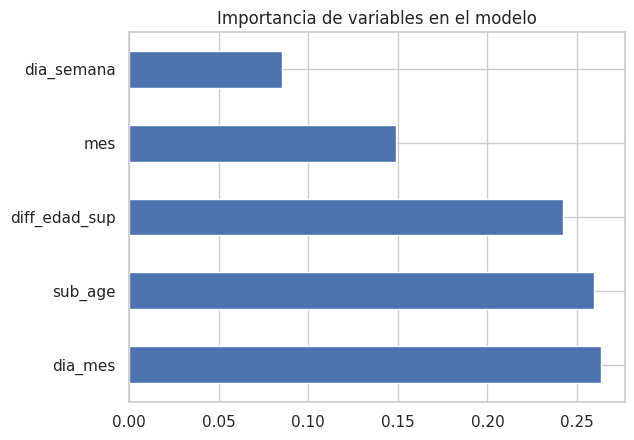

In [ ]:
# Importancia de variables
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nImportancia de variables:")
print(feature_importance)

# Visualizar
feature_importance.plot(kind='barh', title='Importancia de variables en el modelo')
plt.show()

Interpretación

- Que el día del mes, la edad del trabajador y la diferencia con el supervisor explican la mayoría de la eficiencia.
- El mes y el día de la semana ayudan, pero menos.

- Con esta información se puede ajustar la predicción para reducir el error

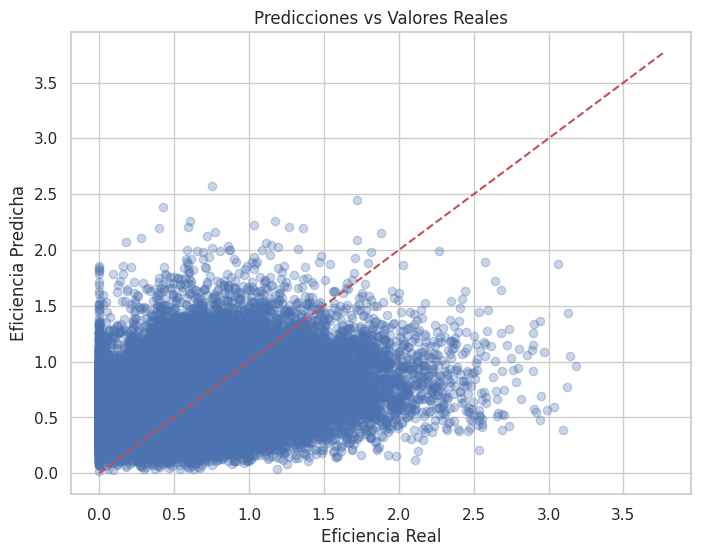

In [ ]:
# Gráfico de dispersión predicho vs real
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia perfecta
plt.xlabel('Eficiencia Real')
plt.ylabel('Eficiencia Predicha')
plt.title('Predicciones vs Valores Reales')
plt.show()

Interpretación

- El modelo se ajusta aunque puede mejorarse, no es totalmente disperso (el caso de una nube) pero no sigue la línea punteada totalmente


- Veamos como mejorar el modelo, probamos regresión lineal, pero antes transformamos los datos brutos en algo más útil (Feature engineering) y entendible para el modelo, se considera indicar al modelo las variables más importantes en base al analisis anterior

Coeficientes del modelo lineal:
dia_semana       0.046874
sub_age          0.004908
dia_mes          0.004708
mes             -0.001647
diff_edad_sup   -0.009664
dtype: float64

MAE: 0.2796


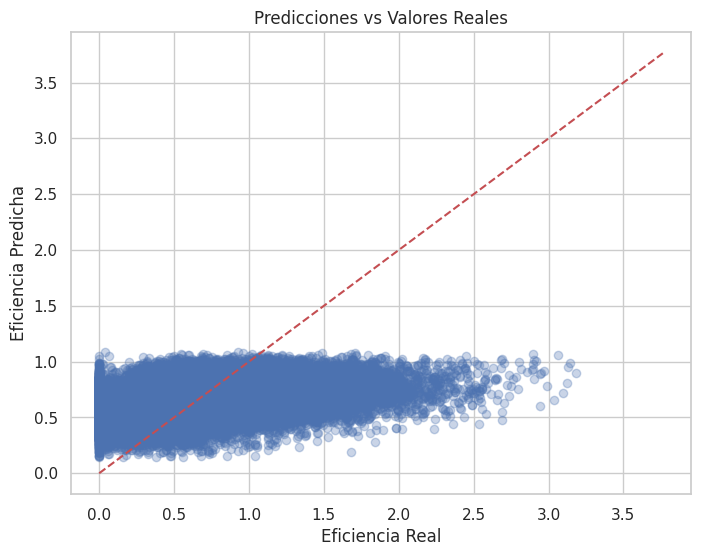

In [ ]:
from sklearn.linear_model import LinearRegression

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes (importancia relativa)
coef = pd.Series(model.coef_, index=features)
print("Coeficientes del modelo lineal:")
print(coef.sort_values(ascending=False))

# Predecir y evaluar
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMAE: {mae:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia perfecta
plt.xlabel('Eficiencia Real')
plt.ylabel('Eficiencia Predicha')
plt.title('Predicciones vs Valores Reales')
plt.show()


Interpretación


El error medio absoluto es menor en comparación con el randomforest (O,27), ahora se conssidera utilizar el Xgboost ya que tenemos diferentes variables que estamos considerando para la predicción



Importancia en XGBoost:
diff_edad_sup    0.292820
dia_semana       0.260929
sub_age          0.222201
mes              0.115240
dia_mes          0.108810
dtype: float32

MAE con XGBoost: 0.2634


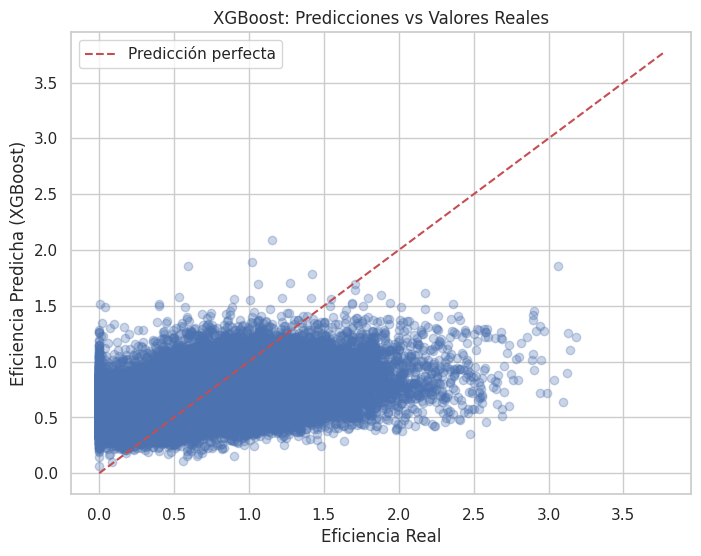

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Importancia de variables
feature_importance = pd.Series(
    model.feature_importances_,
    index=features
).sort_values(ascending=False)
print("\nImportancia en XGBoost:")
print(feature_importance)

# Evaluar
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMAE con XGBoost: {mae:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Predicción perfecta')
plt.xlabel('Eficiencia Real')
plt.ylabel('Eficiencia Predicha (XGBoost)')
plt.title('XGBoost: Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)
plt.show()


Interpretación

- MAE (0.2634):
El modelo se equivoca en ±0.26 puntos de eficiencia.

- El modelo actual confirma que la diferencia de edad con el supervisor es el factor más importante (29%).

- El día de la semana también tiene peso en la eficiencia de los operarios (26%)

- La edad del empleado importa, pero menos que la diferencia con la edad del supervisor

- Los últimos días del mes (21-31) afectan positivamente, pero menos de lo esperado.



Cargamos un ejemplo

In [ ]:
# Reconfirmamos las features que se utilizaron al entrenar el modelo
features = ['sub_age', 'dia_semana', 'dia_mes', 'mes', 'diff_edad_sup']

# Creamos el ejemplo de entrada con los mismos nombres de columnas
ejemplo = pd.DataFrame([{
    'sub_age': 38,
    'dia_semana': 3,
    'dia_mes': 27,
    'mes': 12,
    'diff_edad_sup': -10
}])

# Seleccionamos solo las features que espera el modelo
ejemplo_features = ejemplo[features]

# Hacemos la predicción
eficiencia_predicha = model.predict(ejemplo_features)[0]
print(f"Eficiencia esperada: {eficiencia_predicha:.4f}")


Eficiencia esperada: 1.0029


CONCLUSIONES

Para concluir el estudio sobre la eficiencia laboral del plantel de la empresa, se recapitulan los principales hallazgos y metodologías empleadas:



- El 95% del total de la empresa estan conformado por los operarios, poseen una eficacia media regular, hay operarios específicos con eficacia muy alta. El rol de Shift manager es el que presenta mayor eficacia media y "Team Leader" son el sector con la más baja puntuación.

- No hay diferencia de eficacia entre empleados masculinos y femeninos independientemente del rol que ocupen.

- Los empleados más jovenes (20-32 años) son los que poseen una aficacia menor en la empresa, creciendo de forma progresiva hasta los picos de (45 - 50 años), luego decae en los 60 pero no tanto como en los jóvenes.

- Se determinó que NO hay relación entre la eficacia y la salud de los empleados.


- La eficacia presenta patrones según estacíon y fechas, siendo máxima entre los meses de diciembre-enero y mínima en junio-julio, y aumenta de manera constante durante la semana laboral, de lunes a viernes.

- La eficiencia de los operarios aumenta en la medida que la brecha de edad entre su supervisor es menor, siendo el peor caso cuando el supervisor es más joven que el operario

- No se detectaron patrones que permitan determinar o predecir las renuncias de los operarios, se consideró para ello aspectos de compromiso, ausencias, vínculos sociales. La baja cantidad de casos no permitió hacer conclusiones sólidas

MODELOS PREDICTIVOS

- Inicialmente se intentó predecir las renuncias, pero no se encontraron relaciones sólidas. Luego, se enfocó el análisis en la predicción de la eficacia esperada de los operarios. Se realizó la predicción de la eficiencia esperada para los operarios, que conforman el 95% del plantel de la empresa

- Se probaron distintos modelos: Regresión Lineal, Random Forest y finalmente XGBoost, siendo este último el que ofreció mejores resultados. El error medio absoluto (MAE) fue de 0.2634, lo que representa un 7% del rango total de eficiencia, y mejora al baseline de simplemente predecir el promedio, considerando el la puntación máx de eficiencia es 3,76 y la mínima es 0,1

REFLEXIONES FINALES:

Este estudio permite comprender con mayor claridad los factores que influyen en la eficiencia de los operarios, proporcionando a la empresa una herramienta útil para identificar condiciones favorables y anticipar desempeños esperados.

Además, los resultados pueden servir como base para:

Optimizar la asignación de supervisores según edad.

Planificar mejor las cargas de trabajo según la época del año.

Desarrollar estrategias específicas de formación y seguimiento para empleados jóvenes.

Detectar operarios con desempeños considerablemente bajos y alto para la toma de desiciones de la empresa